In [21]:
from bs4 import BeautifulSoup

In [22]:
import requests

In [23]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'} 

In [24]:
url = "https://www.melon.com/chart/index.htm"
code = requests.get(url, headers = header).text

In [25]:
soup = BeautifulSoup(code,'html.parser') 

In [26]:
title = soup.find_all("div", {"class":"ellipsis rank01"})  
# 노래 제목의 정보는 div 태그의 ellipsis rank01클래스 안에 있음
# find_all함수는 해당 조건에 맞는 모든 태그를 가져옴

In [27]:
artist = soup.find_all("div", {"class":"ellipsis rank02"})  
# 가수의 정보는 div 태그의 ellipsis rank02클래스 안에 있음

In [28]:
album = soup.find_all("div", {"class":"ellipsis rank03"})  
# 가수의 정보는 div 태그의 ellipsis rank02클래스 안에 있음

In [29]:
chart_rank = []
chart_title = []
chart_artist = []
chart_album = []

In [30]:
for a in range (1, 101):
    chart_rank.append(a)

In [31]:
for a in title:
    extract = a.find('a').text
    chart_title.append(extract)
#차트 타이틀 추출
#html 태그에서 노래 제목만(a 태그의 텍스트 값)
# find함수는 해당 조건에 맞는 하나의 태그만 가져옴. 중복이면 가장 첫 번째 태그

In [32]:
for b in artist:
    extract = b.find('a').text
    chart_artist.append(extract)

In [33]:
for c in album:
    extract = c.find('a').text
    chart_album.append(extract)
print(chart_album)

['How You Like That', 'RANDOM BOX', 'María', 'Downtown Baby', '여름 안에서 (Covered By 싹쓰리)', '에잇', '보라빛 밤 (pporappippam)', '슬기로운 의사생활 OST Part 3', '슬기로운 의사생활 OST Part 11', 'NONSTOP', 'NONSTOP', 'I-LAND Part.1 Signal Song', 'The Kids Are Coming', 'Memories', 'MORE & MORE', '어떻게 지내', 'Monster - The 1st Mini Album', 'Boyhood', 'Future Nostalgia', '아무노래', '멜로가 체질 OST Part 3', '사춘기집Ⅱ 꽃 본 나비', 'Love poem', '슬기로운 의사생활 OST Part 2', 'CEREMONIA', '이태원 클라쓰 OST Part.2', 'PLAY', '깡 Official Remix', 'Speak Your Mind (Deluxe)', '늦은 밤 너의 집 앞 골목길에서', '항해', 'Oneiric Diary (幻想日記)', 'MAP OF THE SOUL : 7', 'MAP OF THE SOUL : PERSONA', '사랑의 불시착 OST Part 11', '슬기로운 의사생활 OST Part 12', '슬기로운 의사생활 OST Part 4', '‘The ReVe Festival’ Finale', 'Red Moon : To You My Light', 'Maniac', '`키스 먼저 할까요?` OST Part.3', "SEVENTEEN 7th Mini Album '헹가래'", 'LOOK', '내일은 미스터트롯 우승자 특전곡', '이태원 클라쓰 OST Part.6', '어떻게 지내 (답가)', 'OHIO', '호텔 델루나 OST Part.10', 'Dear', '이태원 클라쓰 OST Part.3', '한 걸음 : 흔적', 'I met you when I was 18. (the playlist)

In [34]:

# a,b,c,d 

# for [
#  { 순위 : a[i]}
#   앨범 : b[i]}
#   가수 : c[i]}

In [35]:
import pymongo #몽고 DB and 파이썬 연결 라이브러리

In [36]:
conn = pymongo.MongoClient('mongodb://localhost') #몽고클라이언트 객체 생성 : ip 입력 ex)localhost 지금은 로컬

In [37]:
melon = conn.crawl #DB연결! DB connection ex) melon DB 연결

In [38]:
melon = melon.melon

In [41]:
melon

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'crawl'), 'melon')

In [42]:
for i in range(1,101):

SyntaxError: unexpected EOF while parsing (<ipython-input-42-855067df5fba>, line 1)

In [44]:
data_list = []
for i in range(0,100):
    data = { 'rank' : chart_rank[i],
             'title' : chart_title[i],
             'artist' : chart_artist[i],
             'album' : chart_album[i]   
           }
    data_list.append(data)


In [45]:
melon.insert_many(data_list) #여러개 넣을때는 insert_many

In [46]:
melon_mongo = melon.find()

In [47]:
melon_mongo

In [48]:
melon.count_documents({}) #로우 출력

200

In [49]:
for mel in melon_mongo:


SyntaxError: unexpected EOF while parsing (<ipython-input-49-e50c89d55b4b>, line 1)

In [50]:
melon.delete_many( {'album': "BOO" } ) #기존 테스트 데이터 삭제 

In [51]:
melon_mongo

In [52]:
melon_mongo = melon.find()

In [53]:
for mel in melon_mongo:

SyntaxError: unexpected EOF while parsing (<ipython-input-53-e50c89d55b4b>, line 1)

In [54]:
lenM = melon.count_documents({}) #로우 출력
lenM

200

In [55]:
#필요 데이터 정제
#같은 가수별 차트 순위 1-100 사이에 몇개나 있는지?
#groupby 'artist'

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split #트레인, 테스트 데이터 분류 
from sklearn.svm import SVC #SVC 서포트 벡터 머신 라이브러리(분류화)
from sklearn.svm import LinearSVC #학습방법 SVM(분류, 회귀) -> SVC는 Classfier(분류) -> 전류도 판단
from sklearn.metrics import accuracy_score, classification_report  #metrics 는 confusion metrics 의 라이브러리 : accuracy/recall/precision 등 모델 평가
from sklearn.neighbors import KNeighborsClassifier #KNN 분류 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [57]:
# csv -> 데이터 프레임 형식으로 일단 만들자
import csv

f = open("melon.csv", "w", encoding='UTF-8')
f.write('rank' + ',' +  'title' + ',' + 'artist' + ',' + 'album' + '\n')
for i in range(0, 100):
    f.write(str(chart_rank[i]) + ',' + chart_title[i] + ',' + chart_artist[i].replace(',', '') + ',' + chart_album[i] + '\n')
f.close()

In [58]:
raw_melon_data = pd.read_csv('melon.csv', encoding='UTF-8', error_bad_lines=False)

b'Skipping line 32: expected 4 fields, saw 5\nSkipping line 37: expected 4 fields, saw 5\nSkipping line 42: expected 4 fields, saw 6\nSkipping line 73: expected 4 fields, saw 5\nSkipping line 89: expected 4 fields, saw 5\n'


In [59]:
raw_melon_data

,rank,title,artist,album
0,1,How You Like That,BLACKPINK,How You Like That
1,2,Summer Hate (Feat. 비),지코 (ZICO),RANDOM BOX
2,3,마리아 (Maria),화사 (Hwa Sa),María
3,4,Downtown Baby,블루 (BLOO),Downtown Baby
4,5,여름 안에서 (Covered By 싹쓰리) (Feat. 황광희),싹쓰리 (유두래곤 린다G 비룡),여름 안에서 (Covered By 싹쓰리)
...,...,...,...,...
90,96,We are Bulletproof : the Eternal,방탄소년단,MAP OF THE SOUL : 7
91,97,비,폴킴,비
92,98,사랑이란 멜로는 없어,전상근,사랑이란 멜로는 없어
93,99,포장마차,황인욱,포장마차


In [60]:
chart_artist_count = raw_melon_data.groupby('artist')
rank_chart = chart_artist
count_chart = chart_artist_count.count()

In [61]:
count_chart = count_chart.sort_values(by='title', ascending=False)
count_chart

,rank,title,album
artist,,,
방탄소년단,11,11,11
아이유,5,5,5
임영웅,3,3,3
폴킴,3,3,3
오반,2,2,2
...,...,...,...
백지영,1,1,1
볼빨간사춘기,1,1,1
블루 (BLOO),1,1,1


In [62]:
test_count_chart = count_chart
test_count_chart = count_chart['rank'] / 100
test_count_chart

artist
방탄소년단           0.11
아이유             0.05
임영웅             0.03
폴킴              0.03
오반              0.02
                ... 
백지영             0.01
볼빨간사춘기          0.01
블루 (BLOO)       0.01
선미              0.01
휘인 (Whee In)    0.01
Name: rank, Length: 66, dtype: float64

In [63]:
count_chart2 = count_chart[count_chart['title'] >= 2]

In [64]:
count_chart2

,rank,title,album
artist,,,
방탄소년단,11,11,11
아이유,5,5,5
임영웅,3,3,3
폴킴,3,3,3
오반,2,2,2
오마이걸,2,2,2
영탁,2,2,2
전상근,2,2,2
마크툽 (MAKTUB),2,2,2


In [65]:
count_chart1 = count_chart[count_chart['title'] <= 1]

In [66]:
#폰트 및 글자 한글 안깨지게 세팅

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [67]:
%matplotlib inline

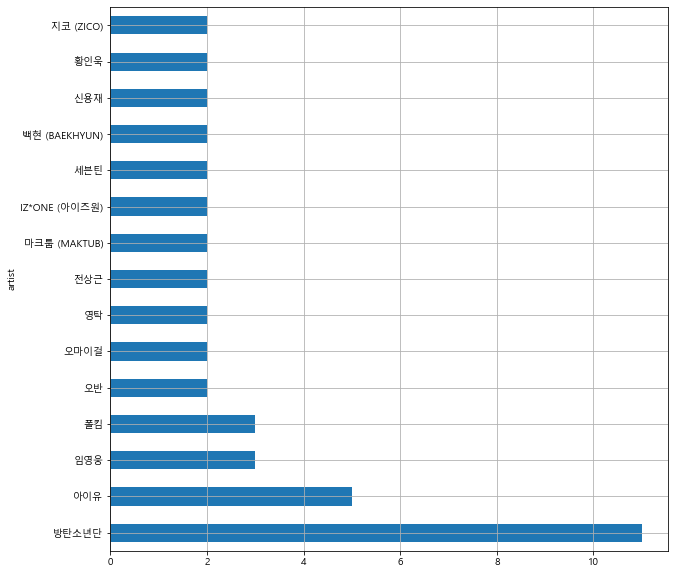

In [68]:
plt.figure()

#barh 는 가로 -> horizontal 수치를 수평적으로 바꾼 그래프임
#'구'를 위에서 인덱스로 바꿨기 때문에, 자동으로 인덱스를 '구'로 잡아 누운(x,y) 가 뒤바뀐 그래프로 그립니다.
count_chart2['title'].plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

In [69]:
count_chart['title'].value_counts()

1     51
2     11
3      2
11     1
5      1
Name: title, dtype: int64

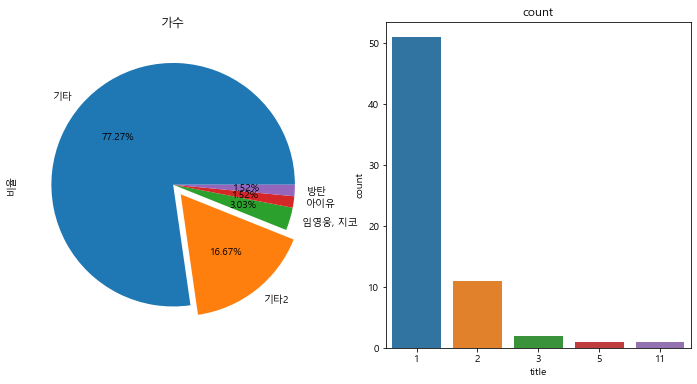

In [70]:
f,ax=plt.subplots(1,2,figsize=(12,6))
labels = ['기타', '기타2', '임영웅, 지코', '아이유', '방탄']
count_chart['title'].value_counts().plot.pie(explode=[0.0, 0.1, 0.0, 0.0, 0.0],
                                             autopct='%1.2f%%',ax=ax[0], labels=labels)

#autopct는 소수점을 어떻게 할 것인가 소수점 2째짜리까지, ax = 0번째 그래프에 넣음
ax[0].set_title('가수')
ax[0].set_ylabel('비율') #ylabe은 y 타이틀 정해주는것임

#countplot은 막대그래프를 그림, data는 데이터프레임을 넣어줌
sns.countplot('title', data=count_chart,ax=ax[1])
ax[1].set_title('count')
plt.show()

## 멜론 차트 1-100 순위상, 1곡만 차트 위에 있는 가수는 77.27%
## 11곡 있는 가수 = '방탄소년단', 7곡 = '아이유, 3곡 = '임영웅, 폴킴' , 2곡 = 다수

In [71]:
count_chart

,rank,title,album
artist,,,
방탄소년단,11,11,11
아이유,5,5,5
임영웅,3,3,3
폴킴,3,3,3
오반,2,2,2
...,...,...,...
백지영,1,1,1
볼빨간사춘기,1,1,1
블루 (BLOO),1,1,1


In [72]:
raw_melon_data.dtypes

rank       int64
title     object
artist    object
album     object
dtype: object

In [73]:
raw_melon_data 

,rank,title,artist,album
0,1,How You Like That,BLACKPINK,How You Like That
1,2,Summer Hate (Feat. 비),지코 (ZICO),RANDOM BOX
2,3,마리아 (Maria),화사 (Hwa Sa),María
3,4,Downtown Baby,블루 (BLOO),Downtown Baby
4,5,여름 안에서 (Covered By 싹쓰리) (Feat. 황광희),싹쓰리 (유두래곤 린다G 비룡),여름 안에서 (Covered By 싹쓰리)
...,...,...,...,...
90,96,We are Bulletproof : the Eternal,방탄소년단,MAP OF THE SOUL : 7
91,97,비,폴킴,비
92,98,사랑이란 멜로는 없어,전상근,사랑이란 멜로는 없어
93,99,포장마차,황인욱,포장마차


## 3. 인기차트 순위와, 차트 위 곡 수가 몇개가 있는지의 상관관계 구하기

In [74]:
cor_melon = raw_melon_data[['rank', 'artist']]

In [75]:
cor_melon

,rank,artist
0,1,BLACKPINK
1,2,지코 (ZICO)
2,3,화사 (Hwa Sa)
3,4,블루 (BLOO)
4,5,싹쓰리 (유두래곤 린다G 비룡)
...,...,...
90,96,방탄소년단
91,97,폴킴
92,98,전상근
93,99,황인욱


In [76]:
count_chart

,rank,title,album
artist,,,
방탄소년단,11,11,11
아이유,5,5,5
임영웅,3,3,3
폴킴,3,3,3
오반,2,2,2
...,...,...,...
백지영,1,1,1
볼빨간사춘기,1,1,1
블루 (BLOO),1,1,1


In [77]:
count_chart.dtypes

rank     int64
title    int64
album    int64
dtype: object

In [78]:
count_chart = count_chart.reset_index("artist")
count_chart

,artist,rank,title,album
0,방탄소년단,11,11,11
1,아이유,5,5,5
2,임영웅,3,3,3
3,폴킴,3,3,3
4,오반,2,2,2
...,...,...,...,...
61,백지영,1,1,1
62,볼빨간사춘기,1,1,1
63,블루 (BLOO),1,1,1
64,선미,1,1,1


In [79]:
melon_join = pd.merge(cor_melon, count_chart, on='artist')
melon_join

,rank_x,artist,rank_y,title,album
0,1,BLACKPINK,1,1,1
1,2,지코 (ZICO),2,2,2
2,20,지코 (ZICO),2,2,2
3,3,화사 (Hwa Sa),1,1,1
4,4,블루 (BLOO),1,1,1
...,...,...,...,...,...
90,84,Etham,1,1,1
91,90,여자친구 (GFRIEND),1,1,1
92,91,정은지,1,1,1
93,92,세훈&찬열,1,1,1


In [80]:
test = melon_join.sort_values(by='title', ascending=False)
test

,rank_x,artist,rank_y,title,album
36,34,방탄소년단,11,11,11
43,95,방탄소년단,11,11,11
45,100,방탄소년단,11,11,11
42,85,방탄소년단,11,11,11
41,83,방탄소년단,11,11,11
...,...,...,...,...,...
50,40,Conan Gray,1,1,1
53,43,Apink (에이핑크),1,1,1
57,45,김필,1,1,1
58,46,런치,1,1,1


In [81]:
melon_join = melon_join[['rank_x','artist','title']]

In [82]:
melon_join

,rank_x,artist,title
0,1,BLACKPINK,1
1,2,지코 (ZICO),2
2,20,지코 (ZICO),2
3,3,화사 (Hwa Sa),1
4,4,블루 (BLOO),1
...,...,...,...
90,84,Etham,1
91,90,여자친구 (GFRIEND),1
92,91,정은지,1
93,92,세훈&찬열,1


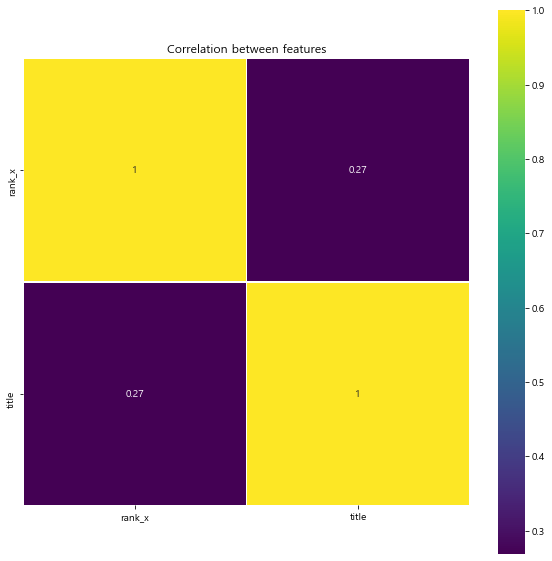

In [83]:
#히트맵 -> 상관도 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(melon_join.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

## 인기차트 1-100 에 몇개의 곡(title)이 올라 와 있는가와 순위(rank) 는 0.29 라는 약한 상관관계를 갖는다.

## 즉, 인기차트 1-100 순위에 해당 가수의 곡이 많더라도, 해당 가수의 곡이 인기가 많다라고는 단정지어 말할수가 없음.

## 